1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

* Multiplications: Each element in the resultant matrix of size $(n,m)$ is calculated using dot product of a row from 1st matrix and a column from 2nd matrix, which means k multiplications needed to get a element but there are nxm elements in resultant matrix so total no of multiplications = $(n \times m \times k)$

*   Additions:
For addition one element is calculated by 1 less no from multiplication so a $(k-1)$ additions is needed but there are nxm elements in resultant matrix so total no of additions =  $(n \times m \times (k-1))$

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [19]:
import time
import numpy as np

# Defining the matrices

A = [[1, 2, 3],
    [4, 5, 6]]
B = [[9, 8, 7, 4],
    [6, 5, 4, 7],
    [3, 2, 1, 2]]

# Function to multiply matrices using list of lists
def matrix_multiply_list_of_lists(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result

# Measuring time for list of lists multiplication
start_time = time.time()
result_list_of_lists = matrix_multiply_list_of_lists(A, B)
end_time = time.time()

time_list_of_lists = end_time - start_time
print("List of Lists Result:")
print(result_list_of_lists)
print(f"Time taken (List of Lists): {time_list_of_lists} seconds")

# Function to multiply matrices using NumPy
def matrix_multiplication_using_numpy(A, B):
  A_np = np.array(A)
  B_np = np.array(B)
  return A_np.dot(B_np)

# Measuring time for NumPy multiplication
start_time = time.time()
result_numpy = matrix_multiplication_using_numpy(A, B)
end_time = time.time()

time_numpy = end_time - start_time
print("NumPy Result:")
print(result_numpy)
print(f"Time taken (NumPy): {time_numpy} seconds")

List of Lists Result:
[[30, 24, 18, 24], [84, 69, 54, 63]]
Time taken (List of Lists): 0.00013399124145507812 seconds
NumPy Result:
[[30 24 18 24]
 [84 69 54 63]]
Time taken (NumPy): 0.00011944770812988281 seconds




> NumPy multiplication is typically faster than using lists of lists because NumPy is implemented in C, which is faster than Python loops. While exact timings can vary based on specific hardware and environment, NumPy is generally quicker for matrix operations due to its highly optimized and low-level implementation.



3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

* Using the stated method,
In 1st pass we have to compare $n$ elements then in 2nd pass we have to compare $(n-1)$ elements in 3rd pass compare $(n-2)$ elements and so on till we reach $\frac{n}{2}$ which is median position \\
* Time complexity = $O(n)+O(n-1)+O(n-2)+...+ O(\frac{n}{2})$ \\
* Using Arithmetic progression sum formula:
* Time complexity = $O(\frac{\frac{n}{2}(n+\frac{n}{2})}{2})$
* Time complexity = $O(\frac{3n^2}{8})$
* So, this method's time complexity is $O(n^2),$ which is higher. \\
* We can reduce it using a sorting technique, whose time complexity is $O(n\log{n})$

In [20]:
import random
import time
import numpy as np

# Sequential method to find the median O(n^2)
def find_median_sequential(arr):
    n = len(arr)
    if n == 0:
        return None

    if n % 2 == 1:
        median_pos1 = n // 2
        median_pos2 = None
    else:
        median_pos1 = n // 2 - 1
        median_pos2 = n // 2

    for i in range(n):
        max_index = i
        for j in range(i + 1, n):
            if arr[j] > arr[max_index]:
                max_index = j
        arr[i], arr[max_index] = arr[max_index], arr[i]

        if i == median_pos1:
            median1 = arr[i]
            if n%2 == 1:
              break
        if i == median_pos2:
            median2 = arr[i]
            break

    if n % 2 == 1:
        return median1
    else:
        return (median1 + median2) / 2

# Quickselect method to find the median O(nlogn)
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = random.choice(arr)

    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]

    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def find_median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        return 0.5 * (quickselect(arr, n // 2 - 1) + quickselect(arr, n // 2))

# Function to time a function call
def time_function(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# Generate a random array
arr = [random.randint(0, 1000) for _ in range(10000)]

# Time the sequential method
seq_median, seq_time = time_function(find_median_sequential, arr.copy())
print(f"Sequential Median: {seq_median}, Time taken: {seq_time:.6f} seconds")

# Time the quickselect method
qs_median, qs_time = time_function(find_median_quickselect, arr.copy())
print(f"Quickselect Median: {qs_median}, Time taken: {qs_time:.6f} seconds")

# Time the numpy median method
np_start_time = time.time()
np_median = np.median(arr)
np_end_time = time.time()
np_time = np_end_time - np_start_time
print(f"NumPy Median: {np_median}, Time taken: {np_time:.6f} seconds")

Sequential Median: 496.0, Time taken: 3.309395 seconds
Quickselect Median: 496.0, Time taken: 0.012137 seconds
NumPy Median: 496.0, Time taken: 0.001619 seconds


4. What is the gradient of the following function with respect to x and y?
\begin{equation}
f(x, y) = x^2 y + y^3 \sin x
\end{equation}

* To find the gradient of the function $f(x, y) = x^2 y + y^3 \sin x $
 with respect to $ x $ and $y$, we need to compute the partial derivatives of $ f $ with respect to $ x $ and $ y $.
* Partial Derivative with respect to $ x $ \\
* Differentiating $ x^2 y $ with respect to $x$: \\
$\frac{∂}{∂x}(x^2 y) = 2xy$
* Differentiating $ y^3 \sin x $ with respect to $x$: \\
$\frac{∂}{∂x}(y^3 \sin x) = y^3 \cos x$ \\
* Combining these results, we get the partial derivative of $ f $ with respect to $ x $: \\
$\frac{\partial f}{\partial x} = 2xy + y^3 \cos x $
* Partial Derivative with respect to $ y $

* Differentiating $ x^2 y $ with respect to $y$: \\
$\frac{∂}{∂y}(x^2 y) = x^2$

* Differentiating $y^3 \sin x$ with respect to $y$: \\
$\frac{\partial}{\partial y} (y^3 \sin x) = 3y^2 \sin x$ \\
* Combining these results, we get the partial derivative of $ f $ with respect to $y $: \\
$ \frac{\partial f}{\partial y} = x^2 + 3y^2 \sin x $
* The gradient of $ f(x, y) $, denoted as $ \nabla f(x, y) $, is the vector of its partial derivatives: \\
$ \nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) $
* Substituting the partial derivatives we found: \\
$ \nabla f(x, y) = \left( 2xy + y^3 \cos x, x^2 + 3y^2 \sin x \right) $
* So, the gradient of the function $ f(x, y) = x^2 y + y^3 \sin x $ with respect to $ x $ and $y $ is: \\
$ \nabla f(x, y) = \left( 2xy + y^3 \cos x, x^2 + 3y^2 \sin x \right) $


5. Use `JAX` to confirm the gradient evaluated by your method matchesanalytical solution \\
 corresponding to a few random values of $x$ and $y$

In [21]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def gradient(fun, x, y, h=1e-5): #  using defination of differentiation
    df_dx = (fun(x + h, y) - fun(x, y)) / h
    df_dy = (fun(x, y + h) - fun(x, y)) / h
    return df_dx, df_dy

# Compute the gradient using JAX
grad_f_x = grad(f, argnums=0)
grad_f_y = grad(f, argnums=1)

# Test values
x_values = np.random.rand(5)
y_values = np.random.rand(5)

# Compute and print the gradients
print("JAX Gradients:")
for x, y in zip(x_values, y_values):
    grad_x = grad_f_x(x, y)
    grad_y = grad_f_y(x, y)
    print(f"f({x:.4f}, {y:.4f}) -> grad_x: {grad_x:.4f}, grad_y: {grad_y:.4f}")

print("\nAnalytical Gradients:")
for x, y in zip(x_values, y_values):
    # Compute the analytical gradients which are resulted in above block
    grad_x_analytical = 2 * x * y + y**3 * np.cos(x)
    grad_y_analytical = x**2 + 3 * y**2 * np.sin(x)
    print(f"f({x:.4f}, {y:.4f}) ->  grad_x: {grad_x_analytical:.4f}, grad_y: {grad_y_analytical:.4f}")
    print(f"Using defination: f({x:.4f}, {y:.4f}) -> grad_x: {gradient(f,x,y)[0]:.4f}, grad_y: {gradient(f,x,y)[1]:.4f}")

JAX Gradients:
f(0.1156, 0.0393) -> grad_x: 0.0092, grad_y: 0.0139
f(0.3853, 0.8084) -> grad_x: 1.1123, grad_y: 0.8851
f(0.3661, 0.8236) -> grad_x: 1.1247, grad_y: 0.8625
f(0.4163, 0.2902) -> grad_x: 0.2640, grad_y: 0.2755
f(0.8115, 0.9125) -> grad_x: 2.0042, grad_y: 2.4706

Analytical Gradients:
f(0.1156, 0.0393) ->  grad_x: 0.0092, grad_y: 0.0139
Using defination: f(0.1156, 0.0393) -> grad_x: 0.0092, grad_y: 0.0139
f(0.3853, 0.8084) ->  grad_x: 1.1123, grad_y: 0.8851
Using defination: f(0.3853, 0.8084) -> grad_x: 1.1146, grad_y: 0.8881
f(0.3661, 0.8236) ->  grad_x: 1.1247, grad_y: 0.8625
Using defination: f(0.3661, 0.8236) -> grad_x: 1.1265, grad_y: 0.8613
f(0.4163, 0.2902) ->  grad_x: 0.2640, grad_y: 0.2755
Using defination: f(0.4163, 0.2902) -> grad_x: 0.2641, grad_y: 0.2760
f(0.8115, 0.9125) ->  grad_x: 2.0042, grad_y: 2.4706
Using defination: f(0.8115, 0.9125) -> grad_x: 2.0027, grad_y: 2.4796


6. Use `sympy` to confirm that you obtain the same gradient analytically.

In [22]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the partial derivatives
grad_f_x_sympy = sp.diff(f, x)
grad_f_y_sympy = sp.diff(f, y)

# Display the symbolic gradients
print("SymPy Gradients:")
print(f"∂f/∂x = {grad_f_x_sympy}")
print(f"∂f/∂y = {grad_f_y_sympy}")

# Evaluate the gradients at the same test values
print("\nEvaluated SymPy Gradients:")
for x_val, y_val in zip(x_values, y_values):
    grad_x_val = grad_f_x_sympy.evalf(subs={x: x_val, y: y_val})
    grad_y_val = grad_f_y_sympy.evalf(subs={x: x_val, y: y_val})
    print(f"f({x_val:.4f}, {y_val:.4f}) -> grad_x: {grad_x_val:.4f}, grad_y: {grad_y_val:.4f}")

SymPy Gradients:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)

Evaluated SymPy Gradients:
f(0.1156, 0.0393) -> grad_x: 0.0092, grad_y: 0.0139
f(0.3853, 0.8084) -> grad_x: 1.1123, grad_y: 0.8851
f(0.3661, 0.8236) -> grad_x: 1.1247, grad_y: 0.8625
f(0.4163, 0.2902) -> grad_x: 0.2640, grad_y: 0.2755
f(0.8115, 0.9125) -> grad_x: 2.0042, grad_y: 2.4706


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [23]:
students_records = {
    2022: {
        "Branch 1": {
            1: {"Name": "N", "Marks": {"Maths": 100, "English": 70}},
            2: {"Name": "M", "Marks": {"Maths": 90, "English": 80}},
        },
        "Branch 2": {
            3: {"Name": "O", "Marks": {"Maths": 85, "English": 75}},
            4: {"Name": "P", "Marks": {"Maths": 95, "English": 65}},
        },
    },
    2023: {
        "Branch 1": {
            5: {"Name": "Q", "Marks": {"Maths": 88, "English": 78}},
            6: {"Name": "R", "Marks": {"Maths": 92, "English": 82}},
        },
        "Branch 2": {
            7: {"Name": "S", "Marks": {"Maths": 78, "English": 88}},
            8: {"Name": "T", "Marks": {"Maths": 85, "English": 90}},
        },
    },
    2024: {
        "Branch 1": {
            9: {"Name": "U", "Marks": {"Maths": 80, "English": 85}},
            10: {"Name": "V", "Marks": {"Maths": 90, "English": 88}},
        },
        "Branch 2": {
            11: {"Name": "W", "Marks": {"Maths": 95, "English": 78}},
            12: {"Name": "X", "Marks": {"Maths": 85, "English": 89}},
        },
    },
    2025: {
        "Branch 1": {
            13: {"Name": "Y", "Marks": {"Maths": 88, "English": 92}},
            14: {"Name": "Z", "Marks": {"Maths": 90, "English": 94}},
        },
        "Branch 2": {
            15: {"Name": "A", "Marks": {"Maths": 80, "English": 86}},
            16: {"Name": "B", "Marks": {"Maths": 85, "English": 84}},
        },
    },
}

# Example of accessing data
year = 2025
branch = "Branch 2"
roll_number = 16

student_info = students_records[year][branch][roll_number]
print(f"Name: {student_info['Name']}, Marks: {student_info['Marks']}")

Name: B, Marks: {'Maths': 85, 'English': 84}


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [24]:
class Marks:
    def __init__(self, maths, english):
        self.maths = maths
        self.english = english
    def __str__(self):
        return f"Maths: {self.maths}, English: {self.english}"

class Student:
    def __init__(self, roll_number, name, marks): # constructor
        self.roll_number = roll_number
        self.name = name
        self.marks = marks
    def __str__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    def add_student(self, student):
        self.students.append(student)
    def __str__(self):
        students_info = "\n  ".join(str(student) for student in self.students)
        return f"Branch: {self.name}, Students: \n  {students_info}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def add_branch(self, branch):
        self.branches.append(branch)
    def __str__(self):
        branches_info = "\n  ".join(str(branch) for branch in self.branches)
        return f"Year: {self.year}, Branches: \n  {branches_info}"

class Database:
    def __init__(self):
        self.years = []
    def add_year(self, year):
        self.years.append(year)
    def __str__(self):
        years_info = "\n  ".join(str(year) for year in self.years)
        return f"Database: \n  {years_info}"

# Creating the database
database = Database()

# Adding years
year_2022 = Year(2022)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1, "N", Marks(100, 70)))
branch_1_2022.add_student(Student(2, "M", Marks(90, 80)))
branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(3, "O", Marks(85, 75)))
branch_2_2022.add_student(Student(4, "P", Marks(95, 65)))
year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)
database.add_year(year_2022)

year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_1_2023.add_student(Student(5, "Q", Marks(88, 78)))
branch_1_2023.add_student(Student(6, "R", Marks(92, 82)))
branch_2_2023 = Branch("Branch 2")
branch_2_2023.add_student(Student(7, "S", Marks(78, 88)))
branch_2_2023.add_student(Student(8, "T", Marks(85, 90)))
year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)
database.add_year(year_2023)

print(database)

Database: 
  Year: 2022, Branches: 
  Branch: Branch 1, Students: 
  Roll Number: 1, Name: N, Marks: Maths: 100, English: 70
  Roll Number: 2, Name: M, Marks: Maths: 90, English: 80
  Branch: Branch 2, Students: 
  Roll Number: 3, Name: O, Marks: Maths: 85, English: 75
  Roll Number: 4, Name: P, Marks: Maths: 95, English: 65
  Year: 2023, Branches: 
  Branch: Branch 1, Students: 
  Roll Number: 5, Name: Q, Marks: Maths: 88, English: 78
  Roll Number: 6, Name: R, Marks: Maths: 92, English: 82
  Branch: Branch 2, Students: 
  Roll Number: 7, Name: S, Marks: Maths: 78, English: 88
  Roll Number: 8, Name: T, Marks: Maths: 85, English: 90


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.




a. $ y = x $




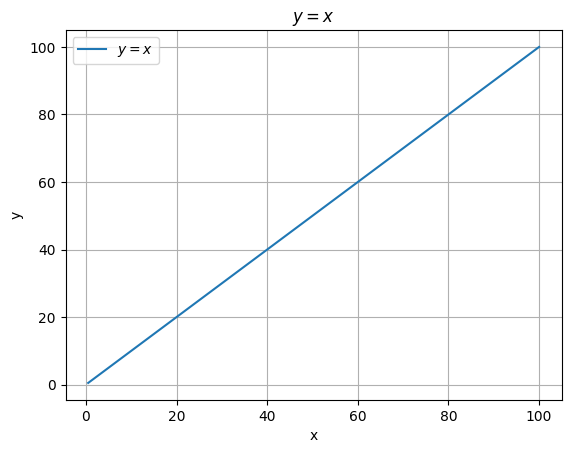

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the domain
x = np.arange(0.5, 100.5, 0.5)

# Defining the functions
y1 = x

plt.plot(x, y1, label='$y=x$')
# Add a legend
plt.legend()

# Add titles and labels
plt.title('$y=x$')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.grid(True)
plt.show()

b. $y=x^2$

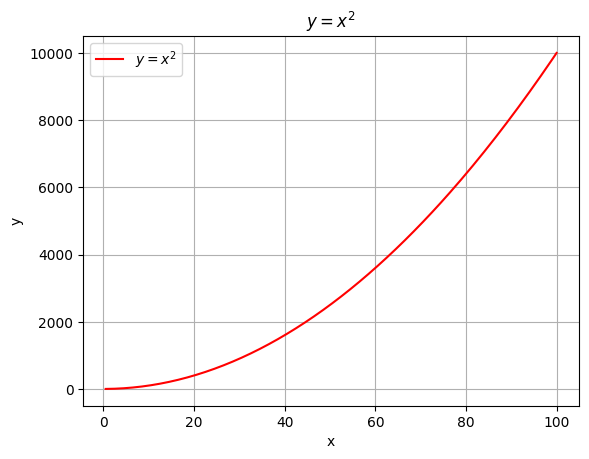

In [26]:
y2 = x**2
plt.plot(x, y2, label='$y=x^2$',color='red')

# Add a legend
plt.legend()

# Add titles and labels
plt.title('$y=x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

c. $y=\frac{x^3}{100}$

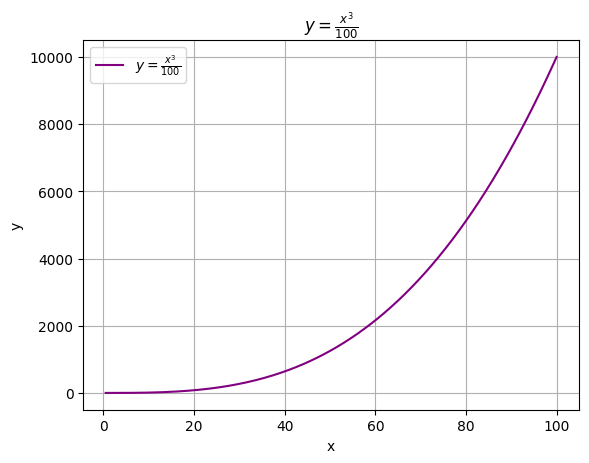

In [27]:
y3 = x**3 / 100
plt.plot(x, y3, label='$y=\\frac{x^3}{100}$',color='purple')

# Add a legend
plt.legend()

# Add titles and labels
plt.title('$y=\\frac{x^3}{100}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

d. $y=\sin(x)$

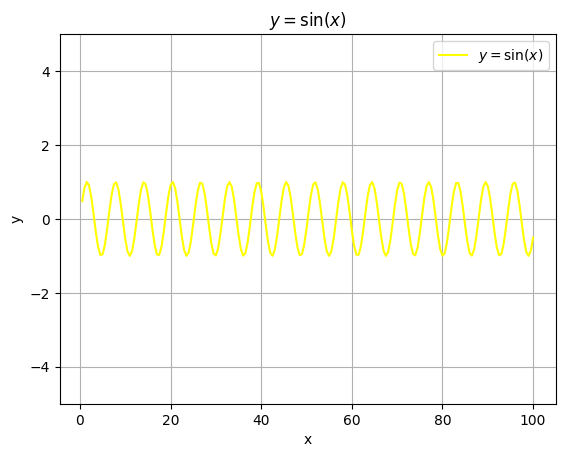

In [28]:
y4 = np.sin(x)
plt.plot(x, y4, label='$y=\sin(x)$',color='yellow')

# Add a legend
plt.legend()

# Add titles and labels
plt.title('$y=\sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.ylim(-5, 5)
plt.show()

e. $y=\frac{\sin(x)}{x}$

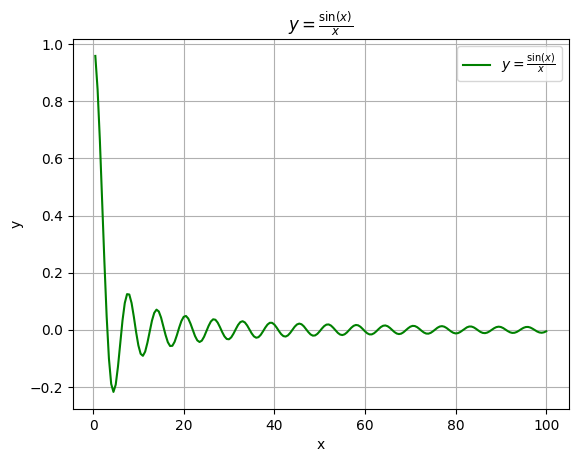

In [29]:
y5 = np.sin(x) / x
plt.plot(x, y5, label='$y=\\frac{\sin(x)}{x}$',color='green')
# Add a legend
plt.legend()

# Add titles and labels
plt.title('$y=\\frac{\sin(x)}{x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

f. $y=\log(x)$

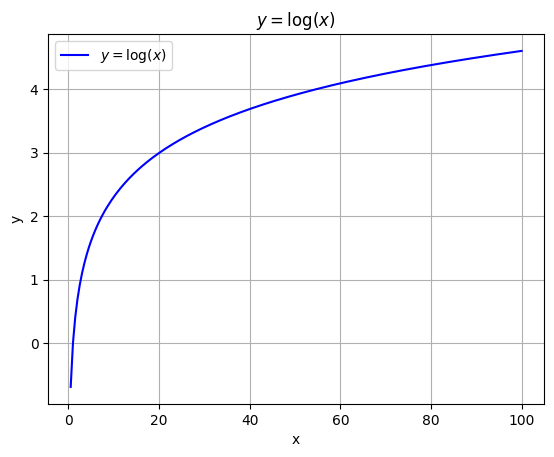

In [30]:
y6 = np.log(x)
plt.plot(x, y6, label='$y=\log(x)$',color='blue')
# Add a legend
plt.legend()

# Add titles and labels
plt.title('$y=\log(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

g. $y=e^x$

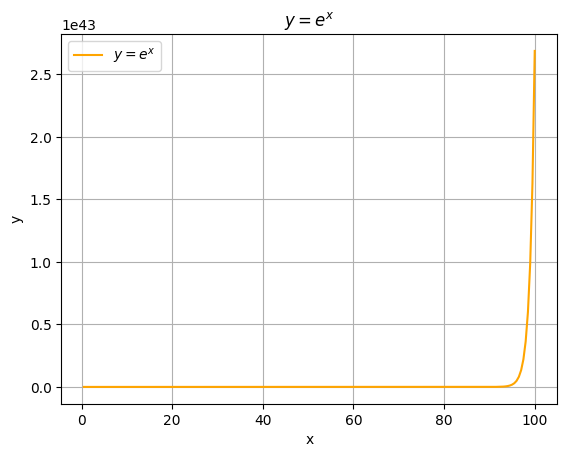

In [31]:
y7 = np.exp(x)
plt.plot(x, y7, label='$y=e^x$',color='orange')

# Add a legend
plt.legend()

# Add titles and labels
plt.title('$y=e^x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [32]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers drawn uniformly from the range 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a dataframe from the matrix with column names a, b, c, d, e
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Finding the index of column with the highest standard deviation
highest_std_column = df.std().idxmax()

# Finding the index of row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

print("Column with highest standard deviation: ", highest_std_column)
print(df[highest_std_column])
print("Row with lowest mean: ", lowest_mean_row)
df.loc[lowest_mean_row]

Column with highest standard deviation:  e
0     1.327112
1     1.160332
2     1.027890
3     1.745263
4     1.919672
5     1.197281
6     1.958834
7     1.473487
8     1.098395
9     1.190141
10    1.280533
11    1.081265
12    1.031088
13    1.892045
14    1.886065
15    1.097060
16    1.463595
17    1.117741
18    1.645706
19    1.589967
Name: e, dtype: float64
Row with lowest mean:  11


a    1.317602
b    1.157423
c    1.082454
d    1.130274
e    1.081265
Name: 11, dtype: float64

In [33]:
print(df)

           a         b         c         d         e
0   1.063790  1.787803  1.995091  1.193856  1.327112
1   1.163736  1.470567  1.813976  1.664837  1.160332
2   1.263711  1.834289  1.123562  1.584730  1.027890
3   1.990817  1.331536  1.763171  1.964812  1.745263
4   1.868298  1.086286  1.857985  1.827975  1.919672
5   1.715636  1.565501  1.984499  1.694227  1.197281
6   1.154000  1.967761  1.911230  1.742631  1.958834
7   1.498350  1.366419  1.879312  1.324264  1.473487
8   1.303748  1.507790  1.897569  1.979831  1.098395
9   1.164133  1.236802  1.518530  1.899642  1.190141
10  1.038403  1.832716  1.797279  1.220726  1.280533
11  1.317602  1.157423  1.082454  1.130274  1.081265
12  1.575681  1.663051  1.798643  1.120222  1.031088
13  1.864116  1.680895  1.421788  1.644568  1.892045
14  1.096017  1.326775  1.889753  1.485231  1.886065
15  1.205342  1.268404  1.925978  1.843952  1.097060
16  1.856966  1.175532  1.282865  1.633346  1.463595
17  1.709419  1.829921  1.910786  1.756003  1.

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively

In [34]:
df["f"] = df.sum(axis=1)
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")
print(df)

           a         b         c         d         e         f    g
0   1.063790  1.787803  1.995091  1.193856  1.327112  7.367651  LT8
1   1.163736  1.470567  1.813976  1.664837  1.160332  7.273448  LT8
2   1.263711  1.834289  1.123562  1.584730  1.027890  6.834181  LT8
3   1.990817  1.331536  1.763171  1.964812  1.745263  8.795599  GT8
4   1.868298  1.086286  1.857985  1.827975  1.919672  8.560215  GT8
5   1.715636  1.565501  1.984499  1.694227  1.197281  8.157144  GT8
6   1.154000  1.967761  1.911230  1.742631  1.958834  8.734455  GT8
7   1.498350  1.366419  1.879312  1.324264  1.473487  7.541830  LT8
8   1.303748  1.507790  1.897569  1.979831  1.098395  7.787333  LT8
9   1.164133  1.236802  1.518530  1.899642  1.190141  7.009247  LT8
10  1.038403  1.832716  1.797279  1.220726  1.280533  7.169658  LT8
11  1.317602  1.157423  1.082454  1.130274  1.081265  5.769018  LT8
12  1.575681  1.663051  1.798643  1.120222  1.031088  7.188684  LT8
13  1.864116  1.680895  1.421788  1.644568  1.89

In [35]:
# Finding the number of rows where the value in column 'g' is 'LT8'
lt8_count = df[df["g"] == "LT8"].shape[0]
std_f_lt8 = df[df["g"] == "LT8"]['f'].std()
std_f_gt8 = df[df["g"] == "GT8"]['f'].std()
print("Number of rows where g is 'LT8':", lt8_count)
print("Standard deviation of f for rows where g is 'LT8':", std_f_lt8)
print("Standard deviation of f for rows where g is 'GT8':", std_f_gt8)

Number of rows where g is 'LT8': 14
Standard deviation of f for rows where g is 'LT8': 0.5561432178922714
Standard deviation of f for rows where g is 'GT8': 0.24233329631852504


12. Write a small piece of code to explain broadcasting in numpy.

The smaller array is "broadcast" across the larger array so that they have compatible shapes.

In [36]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
matrix = np.array(matrix)
print(matrix)
vector = [-1,0,1]
vector = np.array(vector)
print(vector)
print(vector+matrix) # vector stretched to 3x3 dimension to match the dimension: [[-1,0,1],[-1,0,1],[-1,0,1]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[-1  0  1]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [37]:
import numpy as np
def argmin(A):
    min_value = float("inf")
    for i in range(len(A)):
        if A[i]<min_value:
            min_value = A[i]
            min_index = i
    return min_index
arr = np.array([10,3,2,4,2])
print(argmin(arr))
print(np.argmin(arr))

2
2
